In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
%matplotlib inline

In [25]:
file_names=['prediction_scores.train.val.txt','prediction_scores.val.val.txt']
score_dict={}
score_list=[]
for i, file_name in enumerate(file_names):
    dices=[]
    jaccards=[]
    with open(file_name) as file:
        for line in file:
            dice, jaccard = line.split(" ")
            if dice!='nan':
                dices.append(float(dice))
                jaccards.append(float(jaccard))
    file.close()
    if i==0:
        pre="train_"
    else:
        pre="val_"
    score_list.append(np.array(dices))
    score_list.append(np.array(jaccards))
    score_dict[pre+'dice'] =dices
    score_dict[pre+'jaccard'] = jaccards
scores = pd.DataFrame(data=score_dict)

In [19]:
all_data = [x for x in scores.to_dict()]

In [20]:
all_data

['val_dice', 'train_jaccard', 'val_jaccard', 'train_dice']

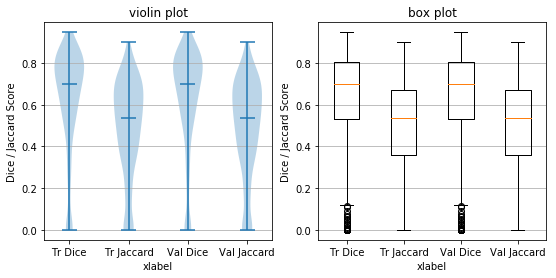

In [29]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(9, 4))

# plot violin plot
axes[0].violinplot(score_list,
                   showmeans=False,
                   showmedians=True)
axes[0].set_title('violin plot')

# plot box plot
axes[1].boxplot(score_list)
axes[1].set_title('box plot')

# adding horizontal grid lines
for ax in axes:
    ax.yaxis.grid(True)
    ax.set_xticks([y+1 for y in range(len(score_list))])
    ax.set_xlabel('xlabel')
    ax.set_ylabel('Dice / Jaccard Score')

# add x-tick labels
plt.setp(axes, xticks=[y+1 for y in range(len(score_list))],
         xticklabels=['Tr Dice', 'Tr Jaccard', 'Val Dice', 'Val Jaccard'])
plt.show()